# Question to be answered:

- Is the accuracy of model/human significantly better? In both force and mass questions?
- Is the distribution of responses significantly different?

In [1]:
import isaac.constants
isaac.constants.TQDM_DISABLE = True

from torch import nn
from isaac.utils import get_cuda_device_if_available
import joblib

from isaac.dataset import read_dataset, prepare_dataset
from isaac.models import MultiBranchModel
from isaac.constants import BASIC_TRAINING_COLS, MASS_CLASS_COLS, FORCE_CLASS_COLS
from isaac.evaluation import evaluate_saved_model
from isaac.statistical_tests import z_test

import torch
import glob
from torch.autograd import Variable
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
device = get_cuda_device_if_available()
print(device)

cpu


RTHETA_ATTRS = [obj+"."+attr for obj in ["o1", "o2", "o3", "o4"] for attr in ["x", "y", "r", "theta"]]

def add_r_theta_attributes(trials):
    for trial in tqdm(trials):
        for obj in ["o1", "o2", "o3", "o4"]:
            trial[obj+".r"] = (trial[obj+".vx"]**2 + trial[obj+".vy"]**2)**0.5
            trial[obj+".theta"] = (np.arctan2(trial[obj+".vx"], trial[obj+".vy"]) * 180 / np.pi)

In [3]:
def get_question_accuracy_for_group_of_models(question_type):
    normalise_data = True
    scaler_path = "scalers/passive_dual_scaler.sk"
    network_dims = (len(BASIC_TRAINING_COLS), 25, 3, 0.5)
    dataset_path = "../new_exp_data/exp7_passive.h5"
    class_columns = [list(MASS_CLASS_COLS), list(FORCE_CLASS_COLS)]
    multiclass = True
    seq_end = 2700
    step_size = 3
    
    models = sorted(glob.glob("models/train_25_mb/best_"+question_type+"_model_seed_*.pt"))

    group_accuracy = []
    group_predictions = []
    
    # trials = read_dataset(dataset_path)
    # add_r_theta_attributes(trials)

    for model_path in tqdm(models):
        accuracies, predicted = evaluate_saved_model(model_path, network_dims, dataset_path, 
                                                     training_columns=BASIC_TRAINING_COLS, class_columns=class_columns, 
                                                     step_size=step_size, seq_end=seq_end, scaler_path=scaler_path,
                                                     arch=MultiBranchModel, multiclass=multiclass, trials=None)

        if question_type == "mass":
            accuracy = accuracies[0]
            predicted = predicted[:, 0]
        else:
            accuracy = accuracies[1]
            predicted = predicted[:, 1]

        group_accuracy.append(accuracy)
        group_predictions.append(predicted.numpy())

    return group_accuracy, group_predictions


def get_participant_accuracy_filtering_by_answer(passive_responses, answer_column, question_type_answer, filter_by_class):
    
    passive_responses = passive_responses.copy().query(question_type_answer+" == "+filter_by_class)
    return passive_responses[answer_column]

# T-test for MASS questions

## Load model's predictions

In [4]:
print("MASS")
question_type = "mass"
group_mass_acc, group_mass_prediction = get_question_accuracy_for_group_of_models(question_type)
     
print("\nFORCE")
question_type = "force"
group_force_acc, group_force_prediction = get_question_accuracy_for_group_of_models(question_type)

  0%|          | 0/25 [00:00<?, ?it/s]

MASS


  4%|▍         | 1/25 [00:00<00:23,  1.01it/s]

Model's accuracy on test set: [69.44444444 63.88888889]


  8%|▊         | 2/25 [00:01<00:21,  1.08it/s]

Model's accuracy on test set: [52.77777778 75.        ]


 12%|█▏        | 3/25 [00:02<00:19,  1.13it/s]

Model's accuracy on test set: [50.         72.22222222]


 16%|█▌        | 4/25 [00:03<00:17,  1.17it/s]

Model's accuracy on test set: [69.44444444 63.88888889]


 20%|██        | 5/25 [00:04<00:16,  1.18it/s]

Model's accuracy on test set: [63.88888889 61.11111111]


 24%|██▍       | 6/25 [00:04<00:15,  1.20it/s]

Model's accuracy on test set: [52.77777778 72.22222222]


 28%|██▊       | 7/25 [00:05<00:14,  1.22it/s]

Model's accuracy on test set: [52.77777778 61.11111111]


 32%|███▏      | 8/25 [00:06<00:13,  1.24it/s]

Model's accuracy on test set: [50.         55.55555556]


 36%|███▌      | 9/25 [00:07<00:13,  1.18it/s]

Model's accuracy on test set: [47.22222222 52.77777778]


 40%|████      | 10/25 [00:08<00:12,  1.21it/s]

Model's accuracy on test set: [47.22222222 63.88888889]


 44%|████▍     | 11/25 [00:09<00:11,  1.19it/s]

Model's accuracy on test set: [50.         77.77777778]


 48%|████▊     | 12/25 [00:09<00:10,  1.19it/s]

Model's accuracy on test set: [55.55555556 77.77777778]


 52%|█████▏    | 13/25 [00:10<00:10,  1.20it/s]

Model's accuracy on test set: [58.33333333 52.77777778]


 56%|█████▌    | 14/25 [00:11<00:09,  1.17it/s]

Model's accuracy on test set: [61.11111111 75.        ]


 60%|██████    | 15/25 [00:12<00:08,  1.21it/s]

Model's accuracy on test set: [50.         63.88888889]


 64%|██████▍   | 16/25 [00:13<00:07,  1.23it/s]

Model's accuracy on test set: [55.55555556 61.11111111]


 68%|██████▊   | 17/25 [00:14<00:06,  1.24it/s]

Model's accuracy on test set: [41.66666667 66.66666667]


 72%|███████▏  | 18/25 [00:14<00:05,  1.25it/s]

Model's accuracy on test set: [66.66666667 69.44444444]


 76%|███████▌  | 19/25 [00:15<00:04,  1.21it/s]

Model's accuracy on test set: [50.         55.55555556]


 80%|████████  | 20/25 [00:16<00:04,  1.23it/s]

Model's accuracy on test set: [52.77777778 66.66666667]


 84%|████████▍ | 21/25 [00:17<00:03,  1.25it/s]

Model's accuracy on test set: [41.66666667 72.22222222]


 88%|████████▊ | 22/25 [00:18<00:02,  1.26it/s]

Model's accuracy on test set: [52.77777778 58.33333333]


 92%|█████████▏| 23/25 [00:19<00:01,  1.18it/s]

Model's accuracy on test set: [50.         61.11111111]


 96%|█████████▌| 24/25 [00:19<00:00,  1.20it/s]

Model's accuracy on test set: [41.66666667 58.33333333]


  0%|          | 0/25 [00:00<?, ?it/s]

Model's accuracy on test set: [58.33333333 75.        ]

FORCE


  4%|▍         | 1/25 [00:00<00:20,  1.14it/s]

Model's accuracy on test set: [69.44444444 69.44444444]


  8%|▊         | 2/25 [00:01<00:20,  1.13it/s]

Model's accuracy on test set: [66.66666667 69.44444444]


 12%|█▏        | 3/25 [00:02<00:19,  1.15it/s]

Model's accuracy on test set: [50.         72.22222222]


 16%|█▌        | 4/25 [00:03<00:17,  1.17it/s]

Model's accuracy on test set: [58.33333333 66.66666667]


 20%|██        | 5/25 [00:04<00:16,  1.19it/s]

Model's accuracy on test set: [61.11111111 66.66666667]


 24%|██▍       | 6/25 [00:05<00:15,  1.21it/s]

Model's accuracy on test set: [55.55555556 63.88888889]


 28%|██▊       | 7/25 [00:05<00:14,  1.22it/s]

Model's accuracy on test set: [55.55555556 69.44444444]


 32%|███▏      | 8/25 [00:06<00:13,  1.23it/s]

Model's accuracy on test set: [55.55555556 50.        ]


 36%|███▌      | 9/25 [00:07<00:12,  1.24it/s]

Model's accuracy on test set: [44.44444444 58.33333333]


 40%|████      | 10/25 [00:08<00:12,  1.23it/s]

Model's accuracy on test set: [44.44444444 58.33333333]


 44%|████▍     | 11/25 [00:09<00:11,  1.24it/s]

Model's accuracy on test set: [58.33333333 72.22222222]


 48%|████▊     | 12/25 [00:09<00:10,  1.23it/s]

Model's accuracy on test set: [63.88888889 63.88888889]


 52%|█████▏    | 13/25 [00:10<00:09,  1.24it/s]

Model's accuracy on test set: [55.55555556 61.11111111]


 56%|█████▌    | 14/25 [00:11<00:08,  1.24it/s]

Model's accuracy on test set: [52.77777778 80.55555556]


 60%|██████    | 15/25 [00:12<00:08,  1.15it/s]

Model's accuracy on test set: [61.11111111 61.11111111]


 64%|██████▍   | 16/25 [00:13<00:07,  1.14it/s]

Model's accuracy on test set: [55.55555556 63.88888889]


 68%|██████▊   | 17/25 [00:14<00:06,  1.17it/s]

Model's accuracy on test set: [58.33333333 66.66666667]


 72%|███████▏  | 18/25 [00:15<00:06,  1.16it/s]

Model's accuracy on test set: [66.66666667 69.44444444]


 76%|███████▌  | 19/25 [00:15<00:05,  1.18it/s]

Model's accuracy on test set: [52.77777778 61.11111111]


 80%|████████  | 20/25 [00:16<00:04,  1.19it/s]

Model's accuracy on test set: [52.77777778 66.66666667]


 84%|████████▍ | 21/25 [00:17<00:03,  1.20it/s]

Model's accuracy on test set: [41.66666667 75.        ]


 88%|████████▊ | 22/25 [00:18<00:02,  1.18it/s]

Model's accuracy on test set: [61.11111111 58.33333333]


 92%|█████████▏| 23/25 [00:19<00:01,  1.20it/s]

Model's accuracy on test set: [52.77777778 61.11111111]


 96%|█████████▌| 24/25 [00:20<00:00,  1.21it/s]

Model's accuracy on test set: [44.44444444 61.11111111]


100%|██████████| 25/25 [00:20<00:00,  1.23it/s]

Model's accuracy on test set: [58.33333333 75.        ]


In [5]:
group_mass_prediction = np.array(group_mass_prediction)
group_force_prediction = np.array(group_force_prediction)

In [6]:
answers = []
for question_i in range(group_mass_prediction.shape[1]):
    
    mass_predictions = list(group_mass_prediction[:, question_i])
    question_mass_answers = [(key, mass_predictions.count(key)) for key in range(3)]
    question_mass_answers = sorted(question_mass_answers, key=lambda x: x[1], reverse=True)
    question_mass_answers = np.hstack(question_mass_answers)
    
    force_predictions = list(group_force_prediction[:, question_i])
    question_force_answers = [(key, force_predictions.count(key)) for key in range(3)]
    question_force_answers = sorted(question_force_answers, key=lambda x: x[1], reverse=True)
    question_force_answers = np.hstack(question_force_answers)
    
    answers.append(np.hstack((question_mass_answers, question_force_answers)))
    

model_answers_df = pd.DataFrame(data=answers, 
                                columns=["model_first_mass_resp", "model_first_mass_count", 
                                         "model_second_mass_resp", "model_second_mass_count",
                                         "model_third_mass_resp", "model_third_mass_count",
                                         "model_first_rel_resp", "model_first_rel_count", 
                                         "model_second_rel_resp", "model_second_rel_count",
                                         "model_third_rel_resp", "model_third_rel_count"
                                         ])

model_answers_df = model_answers_df.fillna(0)

mass_answer_id_to_str = lambda x: MASS_CLASS_COLS[int(x)]
rel_answer_id_to_str = lambda x: FORCE_CLASS_COLS[int(x)]

model_answers_df.model_first_mass_resp = model_answers_df.model_first_mass_resp.apply(mass_answer_id_to_str)
model_answers_df.model_second_mass_resp = model_answers_df.model_second_mass_resp.apply(mass_answer_id_to_str)
model_answers_df.model_third_mass_resp = model_answers_df.model_third_mass_resp.apply(mass_answer_id_to_str)

model_answers_df.model_first_rel_resp = model_answers_df.model_first_rel_resp.apply(rel_answer_id_to_str)
model_answers_df.model_second_rel_resp = model_answers_df.model_second_rel_resp.apply(rel_answer_id_to_str)
model_answers_df.model_third_rel_resp = model_answers_df.model_third_rel_resp.apply(rel_answer_id_to_str)

In [7]:
model_answers_df.head()

,model_first_mass_resp,model_first_mass_count,model_second_mass_resp,model_second_mass_count,model_third_mass_resp,model_third_mass_count,model_first_rel_resp,model_first_rel_count,model_second_rel_resp,model_second_rel_count,model_third_rel_resp,model_third_rel_count
0,A,12,same,11,B,2,attract,21,none,4,repel,0
1,A,19,same,6,B,0,attract,25,none,0,repel,0
2,B,24,same,1,A,0,attract,25,none,0,repel,0
3,same,15,A,9,B,1,none,16,repel,6,attract,3
4,same,18,A,6,B,1,none,15,repel,10,attract,0


model_answers_df.to_hdf("../new_exp_data/rnn_answers_with_counts.h5", key="key")

In [8]:
import json

In [9]:
condition_world_variant = []
world_id = []

for condition_id in range(1, 5):
    filename = "../new_exp_data/physics_data%d.json" % condition_id
    fd = open(filename)
    sim_data = json.load(fd)
    
    for sim in sim_data:
        if sim["practice"]:
            continue
        condition_world_variant.append(sim["condition_world_variant"])
        world_id.append(sim["world_id"])

In [10]:
model_answers_df["condition_world_variant"] = condition_world_variant
model_answers_df["world_id"] = world_id

In [11]:
model_answers_df.head()

,model_first_mass_resp,model_first_mass_count,model_second_mass_resp,model_second_mass_count,model_third_mass_resp,model_third_mass_count,model_first_rel_resp,model_first_rel_count,model_second_rel_resp,model_second_rel_count,model_third_rel_resp,model_third_rel_count,condition_world_variant,world_id
0,A,12,same,11,B,2,attract,21,none,4,repel,0,1,481
1,A,19,same,6,B,0,attract,25,none,0,repel,0,1,856
2,B,24,same,1,A,0,attract,25,none,0,repel,0,1,1819
3,same,15,A,9,B,1,none,16,repel,6,attract,3,1,566
4,same,18,A,6,B,1,none,15,repel,10,attract,0,1,821


## Load human results

In [12]:
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

/home/hector/miniconda3/envs/diss/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Warning messages:

  warnings.warn(x, RRuntimeWarning)
/home/hector/miniconda3/envs/diss/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 1: 
  warnings.warn(x, RRuntimeWarning)
/home/hector/miniconda3/envs/diss/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: In value[[3L]](cond) :
  warnings.warn(x, RRuntimeWarning)
/home/hector/miniconda3/envs/diss/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
 
  warnings.warn(x, RRuntimeWarning)
/home/hector/miniconda3/envs/diss/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  "getThreads" not available for .C() for package "RevoUtilsMath"

  warnings.warn(x, RRuntimeWarning)
/home/hector/miniconda3/envs/diss/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2: 
  warnings.warn(x, RRuntimeWa

In [13]:
rdata_path = "../new_exp_data/e7_passive.rdata"
r['load'](rdata_path)

responses = r["tw"].query("practice == 0")

/home/hector/miniconda3/envs/diss/lib/python3.5/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


# Percentage of participants that get an answer right

In [14]:
passive_responses = []

for name, df in responses.groupby(["cond_worldvar", "world_id", "true_mass", "true_rel"]):
    response = [name[0], name[1], name[2], name[3]]

    value_counts = df.resp_rel.value_counts().sort_index().sort_values(ascending=False)
    for i in range(len(value_counts)):
        answer = value_counts.index[i]
        response.append(answer)
        
        if answer == name[3]:
            got_it_right = value_counts[i]
    response.append(got_it_right / value_counts.sum())
            
    value_counts = df.resp_mass.value_counts().sort_index().sort_values(ascending=False)
    
    for i in range(len(value_counts)):
        answer = value_counts.index[i]
        response.append(answer)
        if answer == name[2]:
            got_it_right = value_counts[i]
            
    response.append(got_it_right / value_counts.sum())
        
    passive_responses.append(response)

In [15]:
passive_responses = pd.DataFrame(data=passive_responses, 
                                 columns=["cond_worldvar", "world_id", "true_mass", "true_rel",  
                                          "resp_rel", "second_resp_rel", "third_resp_rel", "got_rel_right",
                                          "resp_mass", "second_resp_mass", "third_resp_mass", "got_mass_right"])

In [16]:
passive_responses.head()

,cond_worldvar,world_id,true_mass,true_rel,resp_rel,second_resp_rel,third_resp_rel,got_rel_right,resp_mass,second_resp_mass,third_resp_mass,got_mass_right
0,1,1218,A,repel,repel,attract,none,0.76,A,same,B,0.52
1,1,1736,B,none,repel,none,attract,0.40,B,same,A,0.52
2,1,1758,B,repel,repel,attract,none,0.44,B,same,A,0.72
3,1,1819,B,attract,attract,repel,none,0.64,B,same,A,0.60
4,1,438,same,repel,repel,none,attract,0.56,same,B,A,0.36


In [17]:
passive_responses["cond_worldvar"] = passive_responses["cond_worldvar"].astype("int64")
passive_responses["world_id"] = passive_responses["world_id"].astype("int64")

passive_responses = passive_responses.merge(model_answers_df, left_on=["cond_worldvar", "world_id"], right_on=["condition_world_variant", "world_id"])

# Percentage of models that get an answer right

In [18]:
models_that_got_mass_question_right = []

for i, answer in enumerate(passive_responses.true_mass):
    if passive_responses.model_first_mass_resp.iloc[i] == answer:
        models_that_got_mass_question_right.append(passive_responses.model_first_mass_count.iloc[i])
    elif passive_responses.model_second_mass_resp.iloc[i] == answer:
        models_that_got_mass_question_right.append(passive_responses.model_second_mass_count.iloc[i])
    elif passive_responses.model_third_mass_resp.iloc[i] == answer:
        models_that_got_mass_question_right.append(passive_responses.model_third_mass_count.iloc[i])

        
models_that_got_rel_question_right = []
        
for i, answer in enumerate(passive_responses.true_rel):
    if passive_responses.model_first_rel_resp.iloc[i] == answer:
        models_that_got_rel_question_right.append(passive_responses.model_first_rel_count.iloc[i])
        
    elif passive_responses.model_second_rel_resp.iloc[i] == answer:
        models_that_got_rel_question_right.append(passive_responses.model_second_rel_count.iloc[i])
        
    elif passive_responses.model_third_rel_resp.iloc[i] == answer:
        models_that_got_rel_question_right.append(passive_responses.model_third_rel_count.iloc[i])
        

passive_responses["models_got_mass_right"] = np.array(models_that_got_mass_question_right) / 25
passive_responses["models_got_rel_right"] = np.array(models_that_got_rel_question_right) / 25

In [19]:
passive_responses.columns

Index(['cond_worldvar', 'world_id', 'true_mass', 'true_rel', 'resp_rel',
       'second_resp_rel', 'third_resp_rel', 'got_rel_right', 'resp_mass',
       'second_resp_mass', 'third_resp_mass', 'got_mass_right',
       'model_first_mass_resp', 'model_first_mass_count',
       'model_second_mass_resp', 'model_second_mass_count',
       'model_third_mass_resp', 'model_third_mass_count',
       'model_first_rel_resp', 'model_first_rel_count',
       'model_second_rel_resp', 'model_second_rel_count',
       'model_third_rel_resp', 'model_third_rel_count',
       'condition_world_variant', 'models_got_mass_right',
       'models_got_rel_right'],
      dtype='object')

In [20]:
passive_responses["model_mass"] = passive_responses["model_first_mass_resp"]
passive_responses["model_relationship"] = passive_responses["model_first_rel_resp"]

In [21]:
human_mass_accuracy_list = passive_responses.got_mass_right
human_force_accuracy_list = passive_responses.got_rel_right

model_mass_accuracy_list = passive_responses.models_got_mass_right
model_force_accuracy_list = passive_responses.models_got_rel_right

In [22]:
print(np.mean(human_mass_accuracy_list), "±", np.std(human_mass_accuracy_list))
print(np.mean(model_mass_accuracy_list), "±", np.std(model_mass_accuracy_list))

0.37839031339031337 ± 0.145973580677441
0.5366666666666666 ± 0.2839992175263086


In [23]:
print(np.mean(human_force_accuracy_list), "±", np.std(human_force_accuracy_list))
print(np.mean(model_force_accuracy_list), "±", np.std(model_force_accuracy_list))

0.5462250712250714 ± 0.176816239172785
0.6566666666666667 ± 0.21320308523929843


# Perform t-test on overall accuracy

In [24]:
# Null hypothesis (opposite of what we want to prove): accuracies are not significantly different
# Alternative hypothesis: accuracies are significantly different

In [25]:
from scipy.stats import ttest_ind, ttest_rel, f_oneway

#### Is the model significantly better answering mass questions than humans?

In [26]:
ttest_rel(human_mass_accuracy_list, model_mass_accuracy_list)

Ttest_relResult(statistic=-3.6873191331691264, pvalue=0.000763240022957818)

#### Is the model significantly better answering force questions than humans?

In [27]:
ttest_rel(human_force_accuracy_list, model_force_accuracy_list)

Ttest_relResult(statistic=-2.364560857365549, pvalue=0.023727816753575937)

#### Is the model significantly better answering force questions than mass questions?

In [28]:
ttest_ind(model_mass_accuracy_list, model_force_accuracy_list)

Ttest_indResult(statistic=-1.9991187485802633, pvalue=0.049479134569990736)

# Are correct guesses / errors correlated between humans and model?

In [29]:
from scipy.stats import chisquare

In [30]:
passive_responses["model_mass_correct_guesses"] = (passive_responses["model_mass"] == passive_responses["true_mass"])
passive_responses["model_force_correct_guesses"] = (passive_responses["model_relationship"] == passive_responses["true_rel"])

In [31]:
passive_responses["corRel"] = (passive_responses["resp_rel"] == passive_responses["true_rel"])
passive_responses["corMass"] = (passive_responses["resp_mass"] == passive_responses["true_mass"])

In [33]:
mass_coincidence = (passive_responses["resp_mass"] == passive_responses["model_mass"]).mean()
force_coincidence = (passive_responses["resp_rel"] == passive_responses["model_relationship"]).mean()

print(mass_coincidence)
print(force_coincidence)

# FLAG

0.5277777777777778
0.6111111111111112


In [34]:
def test_for_independence(first_answers, second_answers):
    both_correct = (first_answers & second_answers).sum()
    both_wrong = (~first_answers & ~second_answers).sum()
    first_correct_second_wrong = (first_answers & ~second_answers).sum()
    first_wrong_second_correct = (~first_answers & second_answers).sum()
    matrix = np.array([[both_correct, first_correct_second_wrong], [first_wrong_second_correct, both_wrong]])
    
    accuracy_first = first_answers.sum() / len(first_answers)
    accuracy_sec = second_answers.sum() / len(second_answers)
    total_answers = len(first_answers)
    
    
    expected_first = np.array([[accuracy_first/2, accuracy_first/2], [(1 - accuracy_first)/2, (1 - accuracy_first)/2]])
    expected_sec = np.array([[accuracy_sec/2, (1 - accuracy_sec)/2], [accuracy_sec/2, (1 - accuracy_sec)/2]])
    expected = expected_first * expected_sec
    expected /= np.sum(expected)
    expected *= total_answers
    
    chisquare_results = chisquare(matrix, expected, axis=None)
    print("Expected")
    print(expected)
    print("Reality")
    print(matrix)
    return chisquare_results

In [35]:
test_for_independence(passive_responses["corRel"], passive_responses["model_force_correct_guesses"])

Expected
[[23.36111111  5.63888889]
 [ 5.63888889  1.36111111]]
Reality
[[22  7]
 [ 7  0]]


Power_divergenceResult(statistic=2.097502972651607, pvalue=0.5524180941443271)

In [36]:
test_for_independence(passive_responses["corMass"], passive_responses["model_mass_correct_guesses"])
#FLAG

Expected
[[ 7.22222222  5.77777778]
 [12.77777778 10.22222222]]
Reality
[[11  2]
 [ 9 14]]


Power_divergenceResult(statistic=6.959197324414716, pvalue=0.07320972635128)

In [37]:
def test_for_coincidence(first_answers, second_answers, true_answers):
    
    matrix = []
    all_classes = sorted(first_answers.unique())
    
    for class_name in all_classes:
        this_class_coincidences = []
        for second_class_name in all_classes:
            n_coincidences = ((first_answers == class_name) & (second_answers == second_class_name)).sum()
            this_class_coincidences.append(n_coincidences)
            
        matrix.append(this_class_coincidences)
    
    matrix = np.array(matrix)
    
    expected = []    
    for class_name in all_classes:
        this_class_prob = []
        for second_class_name in all_classes:
            prob = 0
            for true_class in all_classes:
                # p_humans(first_class\true_class) * p_rnn(first_class\true_class)
                class_examples = (true_answers == true_class).sum()
                
                p_class = class_examples / len(first_answers)
                p_first_given_class = ((first_answers == class_name) & (true_answers == true_class)).sum() / class_examples
                p_second_given_class = ((second_answers == second_class_name) & (true_answers == true_class)).sum() / class_examples
                val = p_class * p_first_given_class * p_second_given_class
                
                prob += val

            this_class_prob.append(prob)
        expected.append(this_class_prob)
    expected = np.array(expected) 
    expected /= np.sum(expected)
    expected *= len(first_answers)
    print("Expected:")
    print(all_classes)
    print(expected)
    print()
    print("Reality:")
    print(all_classes)
    print(matrix)
    chisquare_results = chisquare(matrix, expected, axis=None)
    
    return chisquare_results

In [38]:
test_for_coincidence(passive_responses["resp_rel"], passive_responses["model_relationship"], passive_responses["true_rel"])

Expected:
['attract', 'none', 'repel']
[[11.          3.75        0.25      ]
 [ 0.          5.91666667  1.08333333]
 [ 0.          7.33333333  6.66666667]]

Reality:
['attract', 'none', 'repel']
[[11  4  0]
 [ 0  5  2]
 [ 0  8  6]]


/home/hector/miniconda3/envs/diss/lib/python3.5/site-packages/scipy/stats/stats.py:4567: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


Power_divergenceResult(statistic=nan, pvalue=nan)

In [39]:
test_for_coincidence(passive_responses["resp_mass"], passive_responses["model_mass"], passive_responses["true_mass"])
# FLAG

Expected:
['A', 'B', 'same']
[[4.16666667 3.33333333 5.5       ]
 [3.75       4.83333333 5.41666667]
 [2.08333333 3.83333333 3.08333333]]

Reality:
['A', 'B', 'same']
[[7 2 4]
 [2 7 5]
 [1 3 5]]


Power_divergenceResult(statistic=6.625007420689579, pvalue=0.5775775702624837)

# Is the model better at predicting any force class?

In [40]:
repel_accuracy_list = get_participant_accuracy_filtering_by_answer(passive_responses, "models_got_rel_right", 
                                                                   "true_rel", "'repel'")

none_accuracy_list = get_participant_accuracy_filtering_by_answer(passive_responses, "models_got_rel_right", 
                                                                   "true_rel", "'none'")

attract_accuracy_list = get_participant_accuracy_filtering_by_answer(passive_responses, "models_got_rel_right", 
                                                                   "true_rel", "'attract'")

In [41]:
print(np.mean(repel_accuracy_list), np.std(repel_accuracy_list))
print(np.mean(none_accuracy_list), np.std(none_accuracy_list))
print(np.mean(attract_accuracy_list), np.std(attract_accuracy_list))

print()

print(ttest_ind(repel_accuracy_list, none_accuracy_list))
print(ttest_ind(repel_accuracy_list, attract_accuracy_list))
print(ttest_ind(attract_accuracy_list, none_accuracy_list))

0.5233333333333333 0.21507104769251384
0.6566666666666666 0.13211947455070944
0.79 0.19261360284258222

Ttest_indResult(statistic=-1.7519733256128291, pvalue=0.09370781302830289)
Ttest_indResult(statistic=-3.0633583242699354, pvalue=0.005691672124483616)
Ttest_indResult(statistic=1.8932832289250123, pvalue=0.0715480390565109)


# Are humans better at predicting any force class? And compared to RNNs?

In [42]:
human_repel_accuracy_list = get_participant_accuracy_filtering_by_answer(passive_responses, "got_rel_right", 
                                                                         "true_rel", "'repel'")

human_none_accuracy_list = get_participant_accuracy_filtering_by_answer(passive_responses, "got_rel_right", 
                                                                        "true_rel", "'none'")

human_attract_accuracy_list = get_participant_accuracy_filtering_by_answer(passive_responses, "got_rel_right", 
                                                                   "true_rel", "'attract'")

print(np.mean(human_repel_accuracy_list), np.std(human_repel_accuracy_list))
print(np.mean(human_none_accuracy_list), np.std(human_none_accuracy_list))
print(np.mean(human_attract_accuracy_list), np.std(human_attract_accuracy_list))


print()

print(ttest_ind(human_repel_accuracy_list, human_none_accuracy_list))
print(ttest_ind(human_repel_accuracy_list, human_attract_accuracy_list))
print(ttest_ind(human_attract_accuracy_list, human_none_accuracy_list))

0.5727350427350427 0.13531888148325485
0.38777777777777783 0.10039803172690473
0.6781623931623932 0.14894697893841963

Ttest_indResult(statistic=3.640639395027706, pvalue=0.0014428896714880582)
Ttest_indResult(statistic=-1.7375664164447775, pvalue=0.09626821719795242)
Ttest_indResult(statistic=5.361722481943239, pvalue=2.204329106568638e-05)


In [43]:
print(ttest_rel(repel_accuracy_list, human_repel_accuracy_list))
print(ttest_rel(none_accuracy_list, human_none_accuracy_list))
print(ttest_rel(attract_accuracy_list, human_attract_accuracy_list))

Ttest_relResult(statistic=-0.5291850077677979, pvalue=0.607190819213975)
Ttest_relResult(statistic=4.788593129525713, pvalue=0.0005635761649337808)
Ttest_relResult(statistic=1.695568588698561, pvalue=0.11805184220926189)


# Is the model better at predicting any mass class?

In [44]:
a_accuracy_list = get_participant_accuracy_filtering_by_answer(passive_responses, "models_got_mass_right", 
                                                                   "true_mass", "'A'")

same_accuracy_list = get_participant_accuracy_filtering_by_answer(passive_responses, "models_got_mass_right", 
                                                                   "true_mass", "'same'")

b_accuracy_list = get_participant_accuracy_filtering_by_answer(passive_responses, "models_got_mass_right", 
                                                                   "true_mass", "'B'")

In [45]:
print(np.mean(a_accuracy_list), np.std(a_accuracy_list))
print(np.mean(same_accuracy_list), np.std(same_accuracy_list))
print(np.mean(b_accuracy_list), np.std(b_accuracy_list))

print()

print(ttest_ind(a_accuracy_list, same_accuracy_list))
print(ttest_ind(a_accuracy_list, b_accuracy_list))
print(ttest_ind(b_accuracy_list, same_accuracy_list))

0.5166666666666667 0.29141417642630607
0.39333333333333337 0.2208066021557226
0.7000000000000001 0.24630604269214884

Ttest_indResult(statistic=1.118786463923166, pvalue=0.27529874421091305)
Ttest_indResult(statistic=-1.5935792331068999, pvalue=0.12529739565212536)
Ttest_indResult(statistic=3.074752405610619, pvalue=0.005542451189118525)


# Are humans better at predicting any mass class? And compared to RNNs?

In [46]:
human_a_accuracy_list = get_participant_accuracy_filtering_by_answer(passive_responses, "got_mass_right", 
                                                                     "true_mass", "'A'")

human_same_accuracy_list = get_participant_accuracy_filtering_by_answer(passive_responses, "got_mass_right", 
                                                                        "true_mass", "'same'")

human_b_accuracy_list = get_participant_accuracy_filtering_by_answer(passive_responses, "got_mass_right", 
                                                                     "true_mass", "'B'")

print(np.mean(human_a_accuracy_list), np.std(human_a_accuracy_list))
print(np.mean(human_same_accuracy_list), np.std(human_same_accuracy_list))
print(np.mean(human_b_accuracy_list), np.std(human_b_accuracy_list))

print()

print()

print(ttest_ind(human_a_accuracy_list, human_same_accuracy_list))
print(ttest_ind(human_a_accuracy_list, human_b_accuracy_list))
print(ttest_ind(human_b_accuracy_list, human_same_accuracy_list))

0.4100427350427351 0.14185875067409623
0.30391025641025643 0.11751739115262044
0.42121794871794865 0.14699406576210686


Ttest_indResult(statistic=1.9108454864102784, pvalue=0.0691424586904233)
Ttest_indResult(statistic=-0.1814353668752333, pvalue=0.8576870862868097)
Ttest_indResult(statistic=2.0673466990693723, pvalue=0.050664413609717754)


In [47]:
print(ttest_rel(a_accuracy_list, human_a_accuracy_list))
print(ttest_rel(same_accuracy_list, human_same_accuracy_list))
print(ttest_rel(b_accuracy_list, human_b_accuracy_list))

Ttest_relResult(statistic=1.1748586914436814, pvalue=0.2648568286198724)
Ttest_relResult(statistic=1.4025056601341677, pvalue=0.18835103389704)
Ttest_relResult(statistic=4.85866796379548, pvalue=0.0005037380051173388)


# Do model's correct answers correspond to examples that a higher percentage of humans guess?

### Mass responses

In [48]:
post_mass_correct_guesses = passive_responses.query("model_mass_correct_guesses")["got_mass_right"]
post_mass_wrong_guesses = passive_responses.query("not model_mass_correct_guesses")["got_mass_right"]

f_oneway(post_mass_correct_guesses, post_mass_wrong_guesses)

F_onewayResult(statistic=4.659555307287202, pvalue=0.03802985826378633)

In [49]:
len(post_mass_correct_guesses), len(post_mass_wrong_guesses)

(20, 16)

### Force responses

In [50]:
post_force_correct_guesses = passive_responses.query("model_force_correct_guesses")['got_rel_right']
post_force_wrong_guesses = passive_responses.query("not model_force_correct_guesses")['got_rel_right']

f_oneway(post_force_correct_guesses, post_force_wrong_guesses)

F_onewayResult(statistic=1.1022776604149753, pvalue=0.3011724606372818)

In [51]:
len(post_force_correct_guesses), len(post_force_wrong_guesses)

(29, 7)

# Are %RNNs and %participants getting a question correct correlated?

In [52]:
np.corrcoef(passive_responses.models_got_mass_right, passive_responses.got_mass_right)

array([[1.        , 0.45199166],
       [0.45199166, 1.        ]])

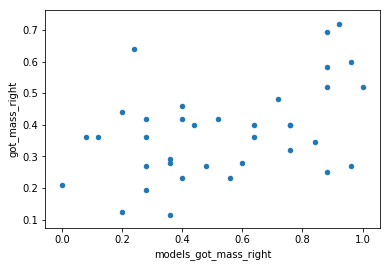

In [53]:
passive_responses.plot(kind="scatter", x="models_got_mass_right", y="got_mass_right")

In [54]:
np.corrcoef(passive_responses.models_got_rel_right, passive_responses.got_rel_right)

array([[1.        , 0.00484687],
       [0.00484687, 1.        ]])

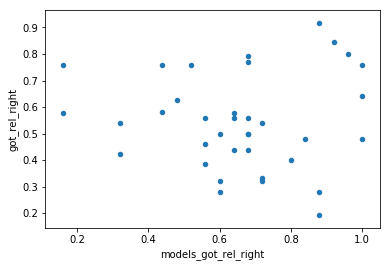

In [55]:
passive_responses.plot(kind="scatter", x="models_got_rel_right", y="got_rel_right")

# Are correct guesses / errors correlated to informativeness?

### Mass responses

not_na_passive_responses = passive_responses[passive_responses["post_ent"].notna()]

post_mass_correct_guesses = not_na_passive_responses.query("model_mass_correct_guesses")["post_ent_mass.rtheta"]
post_mass_wrong_guesses = not_na_passive_responses.query("not model_mass_correct_guesses")["post_ent_mass.rtheta"]

f_oneway(post_mass_correct_guesses, post_mass_wrong_guesses)

post_mass_correct_guesses = not_na_passive_responses.query("corMass == 1")["post_ent_mass.rtheta"]
post_mass_wrong_guesses = not_na_passive_responses.query("corMass == 0")["post_ent_mass.rtheta"]

f_oneway(post_mass_correct_guesses, post_mass_wrong_guesses)

### Force responses

post_force_correct_guesses = not_na_passive_responses[not_na_passive_responses.model_force_correct_guesses]['post_ent_rel.rtheta']
post_force_wrong_guesses = not_na_passive_responses[~not_na_passive_responses.model_force_correct_guesses]['post_ent_rel.rtheta']

f_oneway(post_force_correct_guesses, post_force_wrong_guesses)

post_force_correct_guesses = not_na_passive_responses[(not_na_passive_responses.corRel).astype(bool)]['post_ent_rel.rtheta']
post_force_wrong_guesses = not_na_passive_responses[~(not_na_passive_responses.corRel).astype(bool)]['post_ent_rel.rtheta']

f_oneway(post_force_correct_guesses, post_force_wrong_guesses)

### What percentage of the time does the model match the most common participant answer? second most common? and third?
print((passive_responses["model_mass"] == passive_responses["resp_mass"]).sum() / len(passive_responses))
print((passive_responses["model_mass"] == passive_responses["second_resp_mass"]).sum() / len(passive_responses))
print((passive_responses["model_mass"] == passive_responses["third_resp_mass"]).sum() / len(passive_responses))
print()
print((passive_responses["model_relationship"] == passive_responses["resp_rel"]).sum() / len(passive_responses))
print((passive_responses["model_relationship"] == passive_responses["second_resp_rel"]).sum() / len(passive_responses))
print((passive_responses["model_relationship"] == passive_responses["third_resp_rel"]).sum() / len(passive_responses))